In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
df_SBUX = pd.read_csv('dataset\\stock_SBUX_ytd', sep=';')
df_SBUX.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-03 00:00:00-05:00,98.493532,99.090998,97.425935,98.757988,6607700
1,2023-01-04 00:00:00-05:00,100.579769,102.577848,100.442646,102.313393,8166600
2,2023-01-05 00:00:00-05:00,102.342761,102.940226,101.363311,102.283997,5575100
3,2023-01-06 00:00:00-05:00,103.214489,104.801201,102.852097,104.497574,9644100
4,2023-01-09 00:00:00-05:00,104.331052,104.487767,102.284004,102.587631,10124800


In [36]:
(df_SBUX['Close'] - df_SBUX['Open'])

0      0.264456
1      1.733624
2     -0.058765
3      1.283085
4     -1.743420
         ...   
217   -0.409996
218    1.119995
219    0.369995
220    0.930000
221   -0.779999
Length: 222, dtype: float64

In [37]:
abs(df_SBUX['Close'] - df_SBUX['Open'])

0      0.264456
1      1.733624
2      0.058765
3      1.283085
4      1.743420
         ...   
217    0.409996
218    1.119995
219    0.369995
220    0.930000
221    0.779999
Length: 222, dtype: float64

### Simple Moving Average
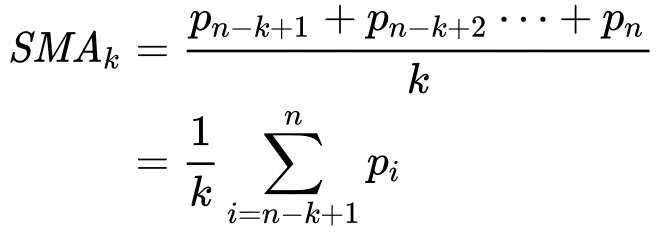

In [38]:
df_SBUX[['Close']].rolling(30).mean().head(30)

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


### Cumulative Moving Average
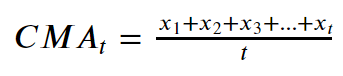

In [39]:
df_SBUX['Close'].expanding().mean()

0       98.757988
1      100.535690
2      101.118459
3      101.963238
4      102.088116
          ...    
217     99.853110
218     99.879351
219     99.907309
220     99.940353
221     99.969450
Name: Close, Length: 222, dtype: float64

### Exponential Moving Average
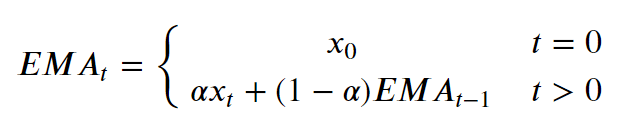

In [40]:
df_SBUX['Close'].ewm(span=30).mean()

0       98.757988
1      100.594947
2      101.195901
3      102.105632
4      102.215299
          ...    
217     97.009809
218     97.564015
219     98.110207
220     98.697291
221     99.194240
Name: Close, Length: 222, dtype: float64

<Axes: >

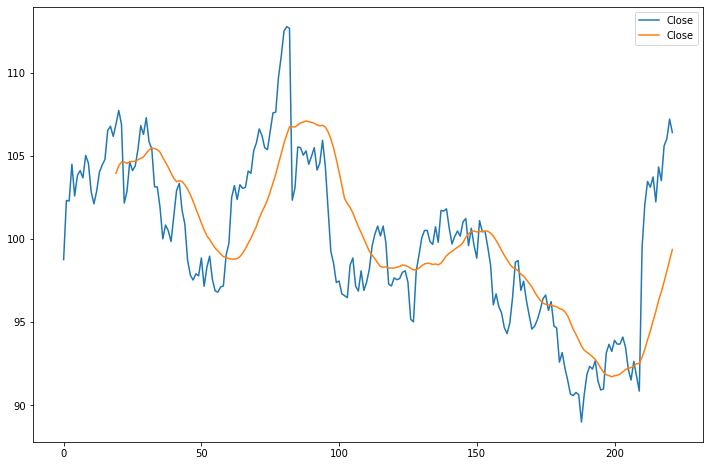

In [41]:
(pd.concat([df_SBUX['Close'],df_SBUX['Close'].rolling(20).mean()], axis=1)).plot(figsize=(12,8))


### Perubahan harga dalam satu hari

In [42]:
df_SBUX['diff'] = (df_SBUX['Close'] - df_SBUX['Open'])
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03 00:00:00-05:00,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04 00:00:00-05:00,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05 00:00:00-05:00,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06 00:00:00-05:00,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09 00:00:00-05:00,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


### Hapus informasi waktu dari tanggal, ubah type data dari Date menjadi DateTime

In [43]:
# Jangan dijalankan lebih dari 1 kali

df_SBUX['Date'] = df_SBUX['Date'].str[:10]
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [44]:
df_SBUX['Date'] = pd.to_datetime(df_SBUX['Date'])
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [45]:
df_SBUX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    222 non-null    datetime64[ns]
 1   Open    222 non-null    float64       
 2   High    222 non-null    float64       
 3   Low     222 non-null    float64       
 4   Close   222 non-null    float64       
 5   Volume  222 non-null    int64         
 6   diff    222 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.3 KB


In [46]:
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [47]:
df_SBUX_tocsv = df_SBUX.set_index(['Date'])
df_SBUX_tocsv.head()

,Open,High,Low,Close,Volume,diff
Date,,,,,,
2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [48]:
df_SBUX_tocsv.to_csv('dataset_clean\\clean_stock_SBUX_ytd', sep=';', index= True, header=True) # jangan dijalankan lebih dari 1 kali